## Ingeniería de Características: Creación de Nuevas Variables (Core)

### **Descripción:**

En esta actividad, trabajarás con el dataset «Titanic – Machine Learning from Disaster» disponible en Kaggle para realizar ingeniería de características. El objetivo es crear nuevas variables a partir de las existentes y evaluar cómo estas nuevas características pueden mejorar la capacidad predictiva de un modelo de machine learning.

**Enlace al dataset:** https://www.kaggle.com/c/titanic

### **Objetivo:**

El objetivo principal es desarrollar habilidades en la creación de nuevas variables que capturen información útil no presente en las variables originales. Estas nuevas características serán utilizadas para mejorar el rendimiento de un modelo de clasificación que prediga la supervivencia de los pasajeros del Titanic.


### **Instrucciones:**

1. **Carga de datos:**
    - Descarga y carga el dataset «Titanic» desde Kaggle. Realiza una exploración inicial de las variables disponibles, que incluyen información sobre la edad, el género, la clase del pasajero, entre otros.
    - Examina cuántos valores faltan en las variables importantes como la edad y el precio del boleto.

2. **Exploración y preprocesamiento de datos:**
- Realiza una limpieza de los datos, manejando los valores nulos. Por ejemplo, puedes imputar los valores faltantes de la edad con la mediana o la media según sea conveniente.
- Revisa la distribución de las variables y asegúrate de que las categorías estén codificadas correctamente para el modelado.

3. **Creación de nuevas características:**
    - Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:
    - **Tamaño de la familia:** Combina las variables «SibSp» (número de hermanos/esposos) y «Parch» (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.
    - **Cabina desconocida:** Crea una variable binaria que indique si la cabina de un pasajero es conocida o no, lo cual podría estar relacionado con la clase o la ubicación a bordo.
    - **Categoría de tarifa:** Agrupa la variable «Fare» en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.
    - **Título del pasajero:** Extrae el título de cada pasajero desde la variable «Name» y crea una nueva variable categórica que represente estos títulos (e.g., Mr., Mrs., Miss.).

4. **Evaluación de nuevas características:**
    - Aplica un modelo de machine learning (como un modelo de regresión logística o un árbol de decisión) antes y después de agregar las nuevas características para evaluar su impacto en el rendimiento del modelo.
    - Utiliza métricas como la exactitud y el F1-score para comparar el rendimiento con y sin las nuevas variables.

5. **Interpretación de los resultados:**
    - Analiza cuáles de las nuevas características tuvieron el mayor impacto en el rendimiento del modelo. ¿Cómo ayudaron a mejorar la capacidad predictiva del modelo en comparación con las variables originales?
    - Discute cómo las nuevas características creadas representan una mejor captura de la información sobre los pasajeros.


**Análisis de Resultados:**

- El análisis debe centrarse en la importancia de las nuevas variables y su capacidad para mejorar la predicción de la supervivencia en el Titanic. Discute los beneficios de realizar ingeniería de características y cómo estas nuevas variables pueden capturar información latente en los datos originales.

Data Dictionary



| **Variable** | **Definition**                  | **Key**                         |
|--------------|----------------------------------|----------------------------------|
| survival     | Survival                        | 0 = No, 1 = Yes                 |
| pclass       | Ticket class                    | 1 = 1st, 2 = 2nd, 3 = 3rd       |
| sex          | Sex                             |                                  |
| Age          | Age in years                    |                                  |
| sibsp        | # of siblings/spouses aboard    |                                  |
| parch        | # of parents/children aboard    |                                  |
| ticket       | Ticket number                   |                                  |
| fare         | Passenger fare                  |                                  |
| cabin        | Cabin number                    |                                  |
| embarked     | Port of Embarkation             | C = Cherbourg, Q = Queenstown, S = Southampton |

### **Librerias y Dataset**

In [1]:
import os
import pandas as pd
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import kagglehub
import kaggle
import zipfile

In [2]:
# Crear el directorio para guardar el dataset
dataset_path = "../data/titanic"
os.makedirs(dataset_path, exist_ok=True)

# Cambiar al directorio del proyecto
os.chdir(dataset_path)

# Descargar el dataset desde Kaggle
!kaggle competitions download -c titanic

# Extraer el archivo ZIP
zip_file_path = "titanic.zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(".")  # Extraer al directorio actual

# Cargar el archivo train.csv
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


### **Exploratory Data Analysis**

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [65]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Cabin,204,147,B96 B98,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
utils.calculate_na_statistics(train)

,datos sin NAs en q,Na en q,Na en %
Cabin,204,687,77.10
Embarked,889,2,0.22
Survived,891,0,0.00
FamilyCategory,891,0,0.00
FamilySize,891,0,0.00
Cabin_known,891,0,0.00
Fare_Category,891,0,0.00
Title_Grouped,891,0,0.00
Fare,891,0,0.00
Pclass,891,0,0.00


In [49]:
# filtrar filas con na en age
train[train['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo del pasajero,Title,Title_Grouped,Fare_Category
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Mr,Mr,Medium_Fare
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr,Mr,Mr,Medium_Fare
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs,Mrs,Mrs,Low_Fare
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr,Mr,Mr,Low_Fare
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,Miss,Miss,Medium_Fare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Mr,Mr,Mr,Low_Fare
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss,Miss,Miss,High_Fare
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Mr,Mr,Mr,Medium_Fare
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Mr,Mr,Mr,Medium_Fare


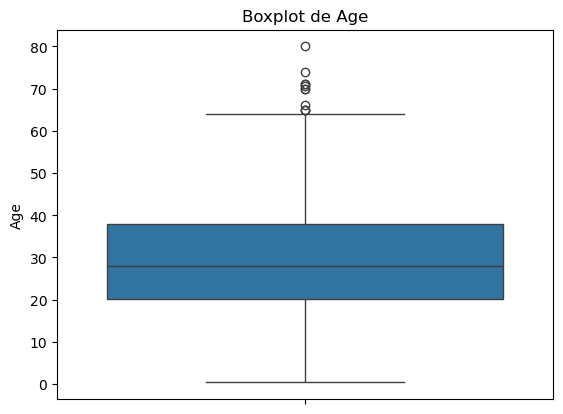

In [48]:
#Boxplot de Age
sns.boxplot(train['Age'])
plt.title('Boxplot de Age')
plt.show()

In [50]:
train['Age'].fillna(train['Age'].median(), inplace=True)

C:\Users\guill\AppData\Local\Temp\ipykernel_6672\486169235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [53]:
train.isna().sum()

Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 2
Titulo del pasajero      0
Title                    0
Title_Grouped            0
Fare_Category            0
dtype: int64

In [54]:
# Crea una variable binaria que indique si la cabina de un pasajero es conocida o no
train['Cabin_known'] = train['Cabin'].isna().astype(int)

In [57]:
train.drop(['Titulo del pasajero','Title'], axis=1, inplace=True)

In [58]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Grouped,Fare_Category,Cabin_known
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Low_Fare,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,High_Fare,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Medium_Fare,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Medium_Fare,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Medium_Fare,1
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Mr,Medium_Fare,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Medium_Fare,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Medium_Fare,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Medium_Fare,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Medium_Fare,1


In [9]:

train["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [15]:
# Limpieza de caracteres
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=True)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\guill\AppData\Local\Temp\ipykernel_6672\4055176995.py:2: SyntaxWarning: invalid escape sequence '\.'
  train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=True)


In [17]:
train['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [26]:
def group_titles(titles_list):
    """
    Agrupa los títulos basándose en un diccionario de mapeo predefinido.
    Los títulos que no estén en el mapeo se mantienen sin cambios.
    
    Args:
        titles_list (list): Lista de títulos a agrupar
        
    Returns:
        list: Lista con los títulos agrupados
    """
    
    # Diccionario de mapeo para agrupar títulos
    title_mapping = {
        # Títulos masculinos
        'Don': 'Mr',
        'Rev': 'Mr',
        'Dr': 'Mr',
        'Major': 'Mr',
        'Sir': 'Mr',
        'Col': 'Mr',
        'Capt': 'Mr',
        'Jonkheer': 'Mr',
        
        # Títulos femeninos
        'Mme': 'Mrs',
        'Lady': 'Mrs',
        'Countess': 'Mrs',
        
        # Títulos femeninos (señorita)
        'Mlle': 'Miss',
        'Ms': 'Miss'
    }
    
    # Lista para almacenar los títulos agrupados
    grouped_titles = []
    
    # Recorrer cada título en la lista original
    for title in titles_list:
        # Si el título está en el diccionario de mapeo, usar el valor mapeado
        # Si no está, mantener el título original
        grouped_title = title_mapping.get(title, title)
        grouped_titles.append(grouped_title)
    
    return grouped_titles

# Ejemplo de uso
titles = ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 
          'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer']

grouped_titles = group_titles(titles)

In [27]:
train['Title_Grouped'] = train['Title'].map(lambda x: group_titles([x])[0])

In [42]:
train['Title_Grouped'].value_counts().sort_index()

Title_Grouped
Master     40
Miss      185
Mr        538
Mrs       128
Name: count, dtype: int64

In [ ]:
def categorize_fare_statistical(fare, mean=32.204208, std=49.693429):
    """
    Categoriza las tarifas usando rangos estadísticos basados en la media y desviación estándar.
    
    Args:
        fare (float): Precio del boleto
        mean (float): Media de las tarifas
        std (float): Desviación estándar de las tarifas
        
    Returns:
        str: Categoría de la tarifa
    """
    if fare <= 0:
        return 'Free_Ticket'
    elif fare <= mean - std:  # Menos de (media - 1 desv. est.)
        return 'Very_Low_Fare'
    elif fare <= mean - (std/2):  # Menos de (media - 0.5 desv. est.)
        return 'Low_Fare'
    elif fare <= mean + (std/2):  # Entre (media - 0.5 desv. est.) y (media + 0.5 desv. est.)
        return 'Medium_Fare'
    elif fare <= mean + std:  # Entre (media + 0.5 desv. est.) y (media + 1 desv. est.)
        return 'High_Fare'
    elif fare <= mean + (2*std):  # Entre (media + 1 desv. est.) y (media + 2 desv. est.)
        return 'Very_High_Fare'
    else:  # Más de (media + 2 desv. est.)
        return 'Premium_Fare'

def analyze_fare_categories(df):
    """
    Aplica la categorización y muestra estadísticas descriptivas por categoría.
    
    Args:
        df (pandas.DataFrame): DataFrame con la columna 'Fare'
    """
    import pandas as pd
    
    # Crear la nueva columna de categorías
    df['Fare_Category'] = df['Fare'].apply(categorize_fare_statistical)
    
    # Calcular estadísticas por categoría
    stats = df.groupby('Fare_Category').agg({
        'Fare': ['count', 'min', 'max', 'mean', 'std']
    }).round(2)
    
    return stats

# Ejemplo de uso:
"""
# Aplicar la categorización
train['Fare_Category'] = train['Fare'].apply(categorize_fare_statistical)

# Para ver las estadísticas de las categorías
stats = analyze_fare_categories(train)
print(stats)

# Para ver la distribución de categorías
print(train['Fare_Category'].value_counts().sort_index())
"""

"\n# Aplicar la categorización\ntrain['Fare_Category'] = train['Fare'].apply(categorize_fare_statistical)\n\n# Para ver las estadísticas de las categorías\nstats = analyze_fare_categories(train)\nprint(stats)\n\n# Para ver la distribución de categorías\nprint(train['Fare_Category'].value_counts().sort_index())\n"

In [39]:
train['Fare_Category'] = train['Fare'].apply(categorize_fare_statistical)

In [41]:
train['Fare_Category'].value_counts().sort_index()

Fare_Category
Free_Ticket        15
High_Fare          52
Low_Fare           69
Medium_Fare       682
Premium_Fare       38
Very_High_Fare     35
Name: count, dtype: int64

In [59]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Grouped,Fare_Category,Cabin_known
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Low_Fare,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,High_Fare,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Medium_Fare,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Medium_Fare,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Medium_Fare,1
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Mr,Medium_Fare,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Medium_Fare,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Medium_Fare,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Medium_Fare,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Medium_Fare,1


In [60]:
# Calcular el tamaño total de la familia (sumamos 1 para incluir al pasajero)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Crear una categoría basada en el tamaño
train['FamilyCategory'] = pd.cut(train['FamilySize'],
                                bins=[0, 1, 3, 6, float('inf')],
                                labels=['Solo', 'Pequeña', 'Mediana', 'Grande'])

# Flag para personas que viajan solas
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Ver la distribución
print("\nDistribución de Tamaños Familiares:")
print(train['FamilySize'].value_counts().sort_index())

print("\nDistribución de Categorías:")
print(train['FamilyCategory'].value_counts())



Distribución de Tamaños Familiares:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

Distribución de Categorías:
FamilyCategory
Solo       537
Pequeña    263
Mediana     66
Grande      25
Name: count, dtype: int64


In [61]:
train.head(30)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Grouped,Fare_Category,Cabin_known,FamilySize,FamilyCategory,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Low_Fare,1,2,Pequeña,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,High_Fare,0,2,Pequeña,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Medium_Fare,1,1,Solo,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Medium_Fare,0,2,Pequeña,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Medium_Fare,1,1,Solo,1
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Mr,Medium_Fare,1,1,Solo,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Medium_Fare,0,1,Solo,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Medium_Fare,1,5,Mediana,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Medium_Fare,1,3,Pequeña,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Medium_Fare,1,2,Pequeña,0


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    int64   
 1   Pclass          891 non-null    int64   
 2   Name            891 non-null    object  
 3   Sex             891 non-null    object  
 4   Age             891 non-null    float64 
 5   SibSp           891 non-null    int64   
 6   Parch           891 non-null    int64   
 7   Ticket          891 non-null    object  
 8   Fare            891 non-null    float64 
 9   Cabin           204 non-null    object  
 10  Embarked        889 non-null    object  
 11  Title_Grouped   891 non-null    object  
 12  Fare_Category   891 non-null    object  
 13  Cabin_known     891 non-null    int32   
 14  FamilySize      891 non-null    int64   
 15  FamilyCategory  891 non-null    category
 16  IsAlone         891 non-null    int32   
dtypes: category(1), 

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Preparar los datos para el modelo original (sin las nuevas variables)
features_original = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Preparar datos para el modelo con nuevas variables
features_new = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title_Grouped', 
                'Fare_Category', 'Cabin_known', 'FamilySize', 'IsAlone']

# Crear X e y para ambos casos
X_orig = pd.get_dummies(train[features_original], drop_first=True)
X_new = pd.get_dummies(train[features_new], drop_first=True)
y = train['Survived']

# Dividir los datos en conjunto de entrenamiento y prueba
X_orig_train, X_orig_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.2, random_state=42)
X_new_train, X_new_test, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_orig_train_scaled = scaler.fit_transform(X_orig_train)
X_orig_test_scaled = scaler.transform(X_orig_test)
X_new_train_scaled = scaler.fit_transform(X_new_train)
X_new_test_scaled = scaler.transform(X_new_test)

# Modelo 1: Regresión Logística con variables originales
lr_orig = LogisticRegression(random_state=42, max_iter=1000)
lr_orig.fit(X_orig_train_scaled, y_train)
lr_orig_pred = lr_orig.predict(X_orig_test_scaled)

# Modelo 2: Regresión Logística con nuevas variables
lr_new = LogisticRegression(random_state=42, max_iter=1000)
lr_new.fit(X_new_train_scaled, y_train_new)
lr_new_pred = lr_new.predict(X_new_test_scaled)

# Modelo 3: Árbol de Decisión con variables originales
dt_orig = DecisionTreeClassifier(random_state=42)
dt_orig.fit(X_orig_train_scaled, y_train)
dt_orig_pred = dt_orig.predict(X_orig_test_scaled)

# Modelo 4: Árbol de Decisión con nuevas variables
dt_new = DecisionTreeClassifier(random_state=42)
dt_new.fit(X_new_train_scaled, y_train_new)
dt_new_pred = dt_new.predict(X_new_test_scaled)

# Imprimir resultados
print("RESULTADOS CON VARIABLES ORIGINALES")
print("\nRegresión Logística:")
print(f"Accuracy: {accuracy_score(y_test, lr_orig_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, lr_orig_pred):.2f}")
print("\nÁrbol de Decisión:")
print(f"Accuracy: {accuracy_score(y_test, dt_orig_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, dt_orig_pred):.2f}")

print("\nRESULTADOS CON NUEVAS VARIABLES")
print("\nRegresión Logística:")
print(f"Accuracy: {accuracy_score(y_test_new, lr_new_pred):.2f}")
print(f"F1-Score: {f1_score(y_test_new, lr_new_pred):.2f}")
print("\nÁrbol de Decisión:")
print(f"Accuracy: {accuracy_score(y_test_new, dt_new_pred):.2f}")
print(f"F1-Score: {f1_score(y_test_new, dt_new_pred):.2f}")

# Imprimir reporte detallado para el mejor modelo
print("\nReporte detallado del mejor modelo (Regresión Logística con nuevas variables):")
print(classification_report(y_test_new, lr_new_pred))

RESULTADOS CON VARIABLES ORIGINALES

Regresión Logística:
Accuracy: 0.81
F1-Score: 0.76

Árbol de Decisión:
Accuracy: 0.78
F1-Score: 0.74

RESULTADOS CON NUEVAS VARIABLES

Regresión Logística:
Accuracy: 0.82
F1-Score: 0.78

Árbol de Decisión:
Accuracy: 0.80
F1-Score: 0.77

Reporte detallado del mejor modelo (Regresión Logística con nuevas variables):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

